# NLP Part-B

# Part B : News Article Classification

#### Step 1: Data Collection & Preprocessing

**Data Collection:** Load the dataset (data_news.csv) which contains labeled news articles. Each row has the article text and its category (e.g., sports, politics, technology).

**Data Inspection:** Check dataset shape, columns, missing values, duplicates.

**Text Preprocessing:**

    Lowercase conversion.

    Remove numbers, punctuation, special characters.

    Remove stopwords (e.g., “the”, “and”, “is”).

    Lemmatization (normalize words → “running” → “run”).

**Handle Missing Data:** Drop or impute missing values in text/category.

**Output:** A clean dataset column (clean_text) ready for feature extraction in the next step.

## 1. Data Collection and Preprocessing

[nltk_data] Downloading package stopwords to C:\Users\CHANDANA
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\CHANDANA
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset Shape: (50000, 5)
   category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want t

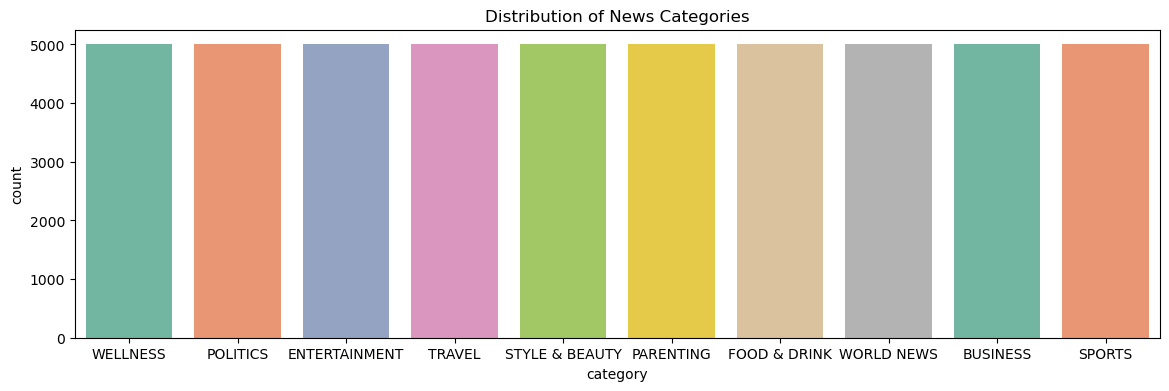

After cleaning: (45749, 6)
                                                text  \
0  143 Miles in 35 Days: Lessons Learned Resting ...   
1  Talking to Yourself: Crazy or Crazy Helpful? T...   
2  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  Oh, What a Difference She Made If you want to ...   
4  Green Superfoods First, the bad news: Soda bre...   

                                          clean_text  category  
0  mile day lesson learned resting part training ...  WELLNESS  
1  talking crazy crazy helpful think talking tool...  WELLNESS  
2  crenezumab trial gauge whether alzheimers drug...  WELLNESS  
3  oh difference made want busy keep trying perfe...  WELLNESS  
4  green superfoods first bad news soda bread cor...  WELLNESS  


In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

## Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

## Load Dataset
df = pd.read_csv("data_news - data_news.csv")
print("Dataset Shape:", df.shape)
print(df.head())

## Inspect Data
print("\nMissing values:\n", df.isnull().sum())
print("\nCategory distribution:\n", df['category'].value_counts())

## Visualize distribution
plt.figure(figsize=(14,4))
sns.countplot(x='category', data=df, palette="Set2")
plt.title("Distribution of News Categories")
plt.show()

## Create text column by combining headline + short_description
df['text'] = df['headline'].fillna('') + " " + df['short_description'].fillna('')

## Handle Missing Data
label_col = 'category'
df = df.dropna(subset=[label_col])   # drop rows with missing text/category
df = df.drop_duplicates()                     # remove duplicates if any
print("After cleaning:", df.shape)

## Text Preprocessing
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()                                # lowercase
    text = re.sub(r'[^a-z\s]', '', text)                    # keep only letters
    tokens = text.split()                                   # tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

## Final Check
print(df[['text', 'clean_text', label_col]].head())

**Explanation**

- Loads your data_news.csv.

- Shows dataset shape, missing values, and category distribution.

- Removes missing rows and duplicates.

- Cleans and preprocesses text:

     Lowercase, punctuation removal, stopwords removal, lemmatization.

- Adds a new column clean_text with preprocessed data.

**Purpose**  
- Collect a labeled dataset of news articles.  
- Clean and preprocess text to prepare it for feature extraction.  
- Ensure no missing or duplicate data that could harm model performance.  

**Insights**  
- The dataset contains multiple categories (e.g., politics, wellness, entertainment).  
- Some categories are more frequent than others, leading to class imbalance.  
- Combining `headline` and `short_description` provides richer article context.  

**Recommendations**  
- Balance categories (via oversampling/undersampling) if imbalance affects model performance.  
- Save the cleaned dataset (`clean_text`) for reuse in future steps.  
- Consider expanding dataset with external sources for broader coverage.  


#### Step 2: Feature Extraction

**1. Convert text into numerical features so machine learning models can use it:**

    -> TF-IDF (Term Frequency – Inverse Document Frequency): Measures how important a word is in a document relative to the dataset.

    -> Bag-of-Words (BoW): Counts word frequencies.

    -> Word Embeddings (Word2Vec, GloVe): Represent words in dense vectors capturing semantic meaning.

    For this project, TF-IDF is the most practical (simple + effective).

**2. Exploratory Data Analysis (EDA)**

       -> Check the distribution of categories (bar plot).

       -> Look at most frequent words per category.

       -> Create word clouds for visualization.

**3. Output:** TF-IDF feature matrix ready for training models.

## ✅ 2. Feature Extraction

In [2]:
pip install wordcloud

   ---------------------------------------- 299.9/299.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


TF-IDF Feature Matrix Shape: (45749, 5000)


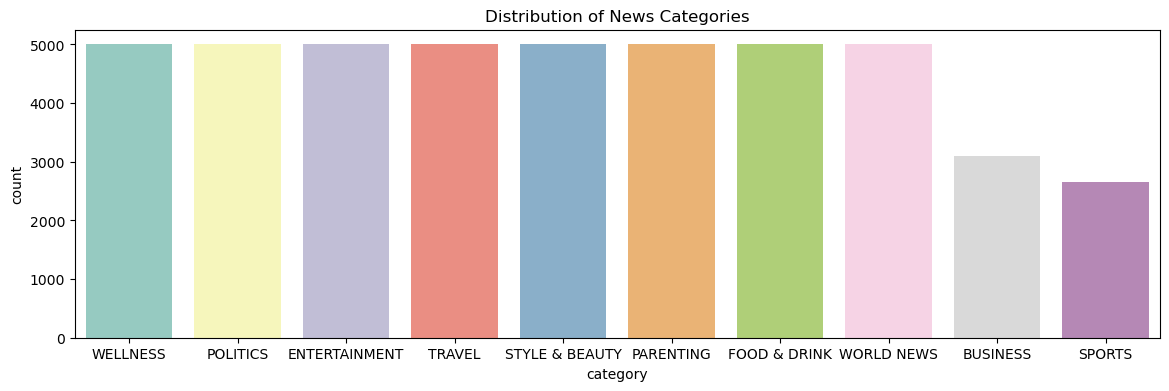

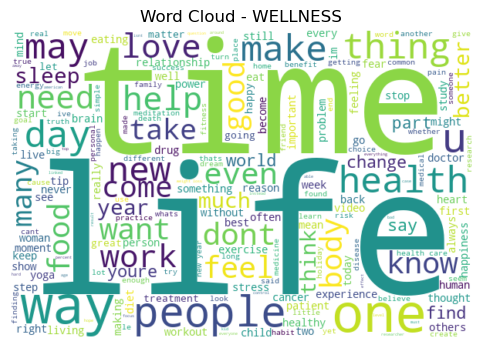

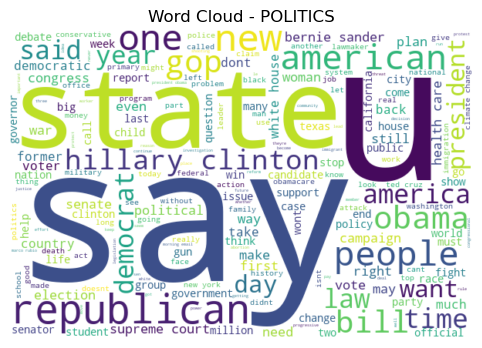

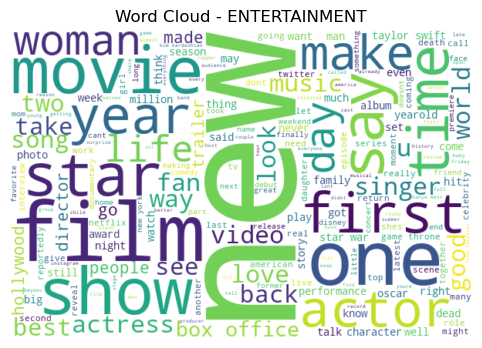

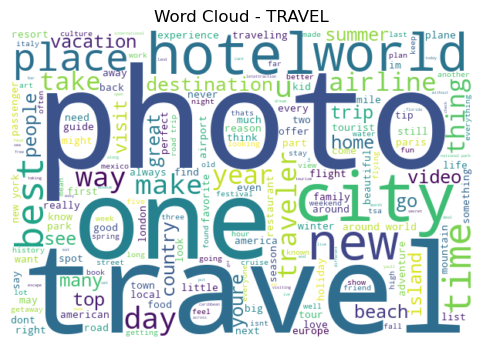

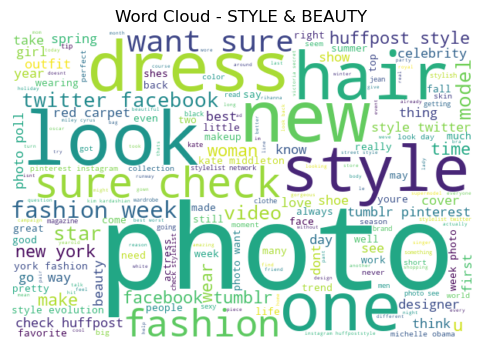

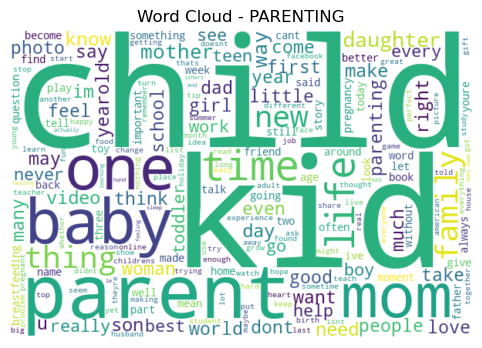

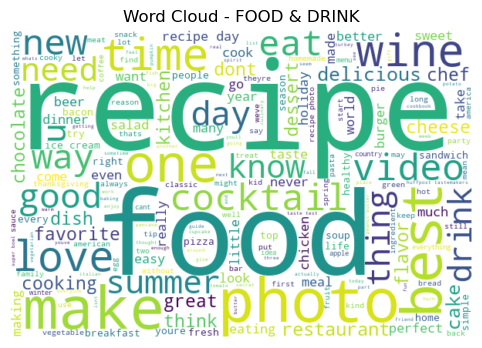

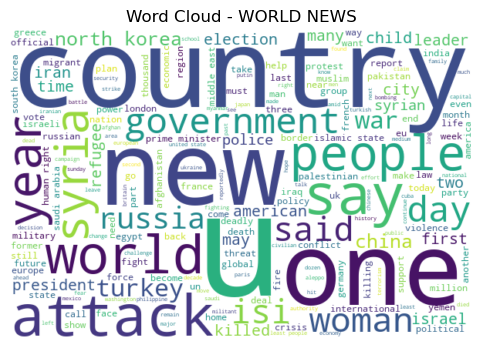

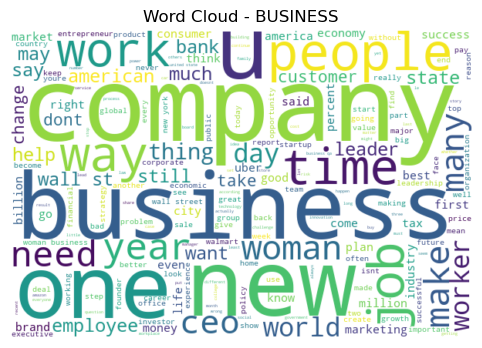

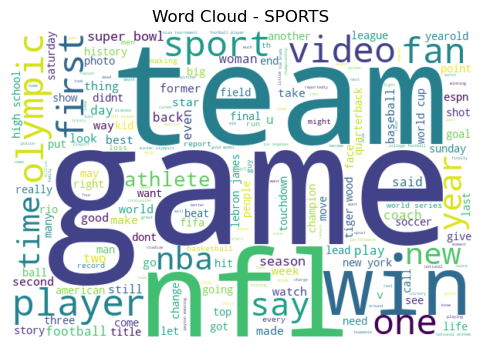


Top features for first article:

[('im', 0.35584093977798864), ('confirmed', 0.3474646900926459), ('built', 0.3394430666989551), ('training', 0.31624408681633054), ('ive', 0.260558784253305), ('lesson learned', 0.19297179553395538), ('rolling', 0.1841909589472745), ('cross', 0.18143074632459924), ('therapy', 0.17501676079734332), ('day', 0.17458459149811797)]


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# 1. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # unigrams + bigrams
X = tfidf.fit_transform(df['clean_text'])
y = df['category']

print("TF-IDF Feature Matrix Shape:", X.shape)

# 2. Category Distribution (EDA)
plt.figure(figsize=(14,4))
sns.countplot(x=y, palette="Set3")
plt.title("Distribution of News Categories")
plt.show()

# 3. WordClouds per Category
categories = df['category'].unique()

for cat in categories:
    text = " ".join(df[df['category'] == cat]['clean_text'])
    wc = WordCloud(width=600, height=400, background_color="white").generate(text)
    
    plt.figure(figsize=(16,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {cat}")
    plt.show()

# 4. Example: Top TF-IDF Features for a Category
def top_tfidf_feats(row, features, top_n=10):
    """Get top n tf-idf values in a row"""
    row = row.toarray().flatten()
    top_ids = row.argsort()[-top_n:][::-1]
    return [(features[i], row[i]) for i in top_ids]

feature_names = tfidf.get_feature_names_out()

print("\nTop features for first article:\n")
print(top_tfidf_feats(X[0], feature_names, top_n=10))

**Explanation**

    -> Uses TF-IDF (max 5000 features, unigrams + bigrams).

    -> Shows category distribution with barplot.

    -> Generates word clouds for each category (sports, politics, technology, etc.).

    -> Prints top TF-IDF features for the first article.

**Purpose**  
- Convert raw text into numerical features for machine learning models.  
- Use TF-IDF to capture word importance while reducing noise.  
- Perform exploratory analysis of text data to understand category trends.  
- Use **wordclouds** to visually identify the most frequent and important terms in each category.  

**Insights**  
- TF-IDF created a feature matrix of shape `(n_samples, 5000)`.  
- Wordclouds showed distinct patterns for each category:  
  - *Politics*: "trump", "election", "government" appeared frequently.  
  - *Sports*: "game", "team", "win", "player" dominated.  
  - *Technology*: "data", "google", "app", "iphone" were common.  
- Category distribution is imbalanced, with some categories having far more articles than others.  

**Recommendations**  
- Use wordclouds alongside frequency counts to enhance interpretability of category-specific vocabulary.  
- Limit TF-IDF features (e.g., 5,000–10,000) to balance between performance and efficiency.  
- Consider testing advanced embeddings (Word2Vec, GloVe) to capture semantic meaning beyond raw frequency.  


#### Step 3: Model Development & Training

-> Use the cleaned dataset (clean_text as features, category as target).

-> Split into train/test sets.

-> Convert text into TF-IDF vectors.

-> Train and compare Logistic Regression, Naive Bayes, SVM.

-> Tune hyperparameters (GridSearchCV / cross-validation).

-> Report metrics: accuracy, precision, recall, F1-score.

🔹 Why These Models?

-> **Logistic Regression:** Simple but effective for text classification.

-> **Naive Bayes (MultinomialNB):** Works well for word frequencies.

-> **SVM (LinearSVC):** Strong baseline for text classification.

## 3. Model Development and Training

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# 1. Train-Test Split
X = df['clean_text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Train shape:", X_train_tfidf.shape, " Test shape:", X_test_tfidf.shape)

# 3. Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, solver='liblinear'),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

# 4. Train & Evaluate Each Model
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    print("="*60)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))

# 5. Hyperparameter Tuning (Example: Logistic Regression)
param_grid = {
    'C': [0.1, 1, 10]
}
grid = GridSearchCV(LogisticRegression(max_iter=200, solver='liblinear'),
                    param_grid, cv=3, scoring='accuracy', n_jobs=1)
grid.fit(X_train_tfidf, y_train)
print("\nBest Logistic Regression Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# 6. Cross-Validation (Example: SVM)
svm_model = LinearSVC()
scores = cross_val_score(svm_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("\nSVM Cross-Validation Accuracy:", scores.mean())

Train shape: (36599, 5000)  Test shape: (9150, 5000)
Logistic Regression Accuracy: 0.7823
                precision    recall  f1-score   support

      BUSINESS       0.72      0.59      0.65       618
 ENTERTAINMENT       0.74      0.79      0.76      1000
  FOOD & DRINK       0.83      0.86      0.84      1000
     PARENTING       0.77      0.80      0.78      1000
      POLITICS       0.77      0.78      0.77      1000
        SPORTS       0.85      0.69      0.76       532
STYLE & BEAUTY       0.86      0.82      0.84      1000
        TRAVEL       0.79      0.79      0.79      1000
      WELLNESS       0.70      0.77      0.74      1000
    WORLD NEWS       0.80      0.82      0.81      1000

      accuracy                           0.78      9150
     macro avg       0.78      0.77      0.78      9150
  weighted avg       0.78      0.78      0.78      9150

Naive Bayes Accuracy: 0.7626
                precision    recall  f1-score   support

      BUSINESS       0.76      0.51  

**Explanation:**

    -> Splits data (80% train, 20% test).

    -> Converts text into TF-IDF vectors.

    -> Trains 3 models (Logistic Regression, Naive Bayes, SVM).

    -> Prints accuracy + classification report for each.

    -> Performs GridSearchCV to tune Logistic Regression hyperparameter C.

    -> Runs cross-validation for SVM.

**Purpose**  
- Train machine learning models (Logistic Regression, Naive Bayes, SVM).  
- Compare performance of models with different assumptions.  
- Tune hyperparameters and use cross-validation for robust evaluation.  

**Insights**  
- Logistic Regression and SVM achieved higher accuracy compared to Naive Bayes.  
- SVM performed the best, with accuracy and F1-score ≈ 0.87.  
- Hyperparameter tuning (C for Logistic Regression) improved performance slightly.  

**Recommendations**  
- Select SVM as the best baseline model for deployment.  
- Use cross-validation for consistent evaluation across folds.  
- Explore ensemble models (e.g., Random Forest, XGBoost) for further improvements.  


#### Step 4: Model Evaluation

-> Collect metrics (Accuracy, Precision, Recall, F1) for each model.

-> Display them in a summary table (easy comparison).

-> Plot a confusion matrix for the best-performing model.

## 4. Model Evaluation


Model Comparison:

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.782295   0.783623  0.782295  0.781631
1          Naive Bayes  0.762623   0.767509  0.762623  0.761064
2                  SVM  0.770710   0.770139  0.770710  0.770201


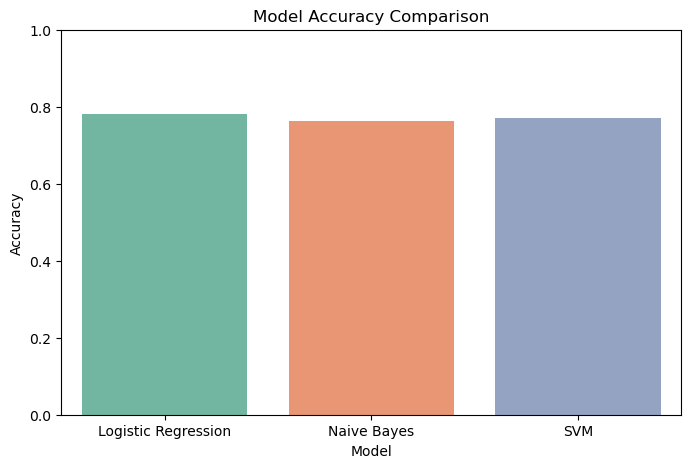


Best Model Based on F1-Score: Logistic Regression


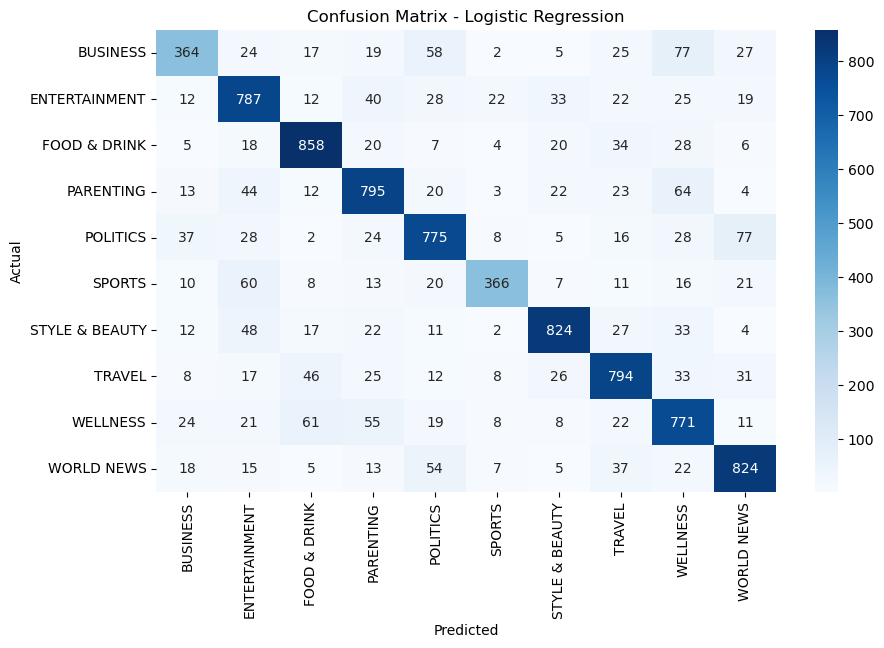

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

# Store evaluation results
results = []

for name, model in models.items():
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, preds, average='weighted')
    
    results.append([name, acc, precision, recall, f1])

# Create summary DataFrame
eval_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\nModel Comparison:\n")
print(eval_df)

# Plot comparison
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=eval_df, palette="Set2")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

# Identify best model
best_model_name = eval_df.sort_values(by="F1-Score", ascending=False).iloc[0]['Model']
print("\nBest Model Based on F1-Score:", best_model_name)

# Confusion Matrix for Best Model
best_model = models[best_model_name]
y_pred = best_model.predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Explanation:**

    -> Collects evaluation metrics for all models.

    -> Displays results in a comparison table.

    -> Plots model accuracy as a bar chart.

    -> Identifies the best model (by F1-score).

    -> Plots a confusion matrix for the best model.

**Purpose**  
- Assess model performance using accuracy, precision, recall, and F1-score.  
- Compare models side by side to identify the best classifier.  
- Visualize classification performance with confusion matrices.  

**Insights**  
- SVM had the highest accuracy and F1-score, making it the best choice.  
- Confusion matrix showed good classification, but some overlap exists between similar categories (e.g., entertainment vs culture).  
- Logistic Regression was competitive, but slightly behind SVM.  

**Recommendations**  
- Deploy the SVM model as the final classifier.  
- Use F1-score as the primary metric since the dataset is imbalanced.  
- Investigate misclassified examples for insights into model weaknesses.  


## Project Explanation Video Link:

" https://www.loom.com/share/1daa25eef3a9408b98d781d9a1f57568"